https://share.google/ZDpp6XA2TXf7CHSkE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('Boston.csv')

In [12]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df.duplicated().sum()   # No duplicated here

np.int64(0)

In [16]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [32]:
df['crim'] = df['crim'].fillna(df['crim'].median())
df['zn'] = df['zn'].fillna(df['zn'].mean())
df['indus'] = df['indus'].fillna(df['indus'].mean())
df['chas'] = df['chas'].fillna(df['chas'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['lstat'] = df['lstat'].fillna(df['lstat'].median())

In [19]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [20]:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [21]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


/tmp/ipython-input-2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
/tmp/ipython-input-2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[columns])
/tmp/ipython-input-2538262764.py:8: UserWarning: 

`distplot` is a deprecated function and wil

<function matplotlib.pyplot.show(close=None, block=None)>

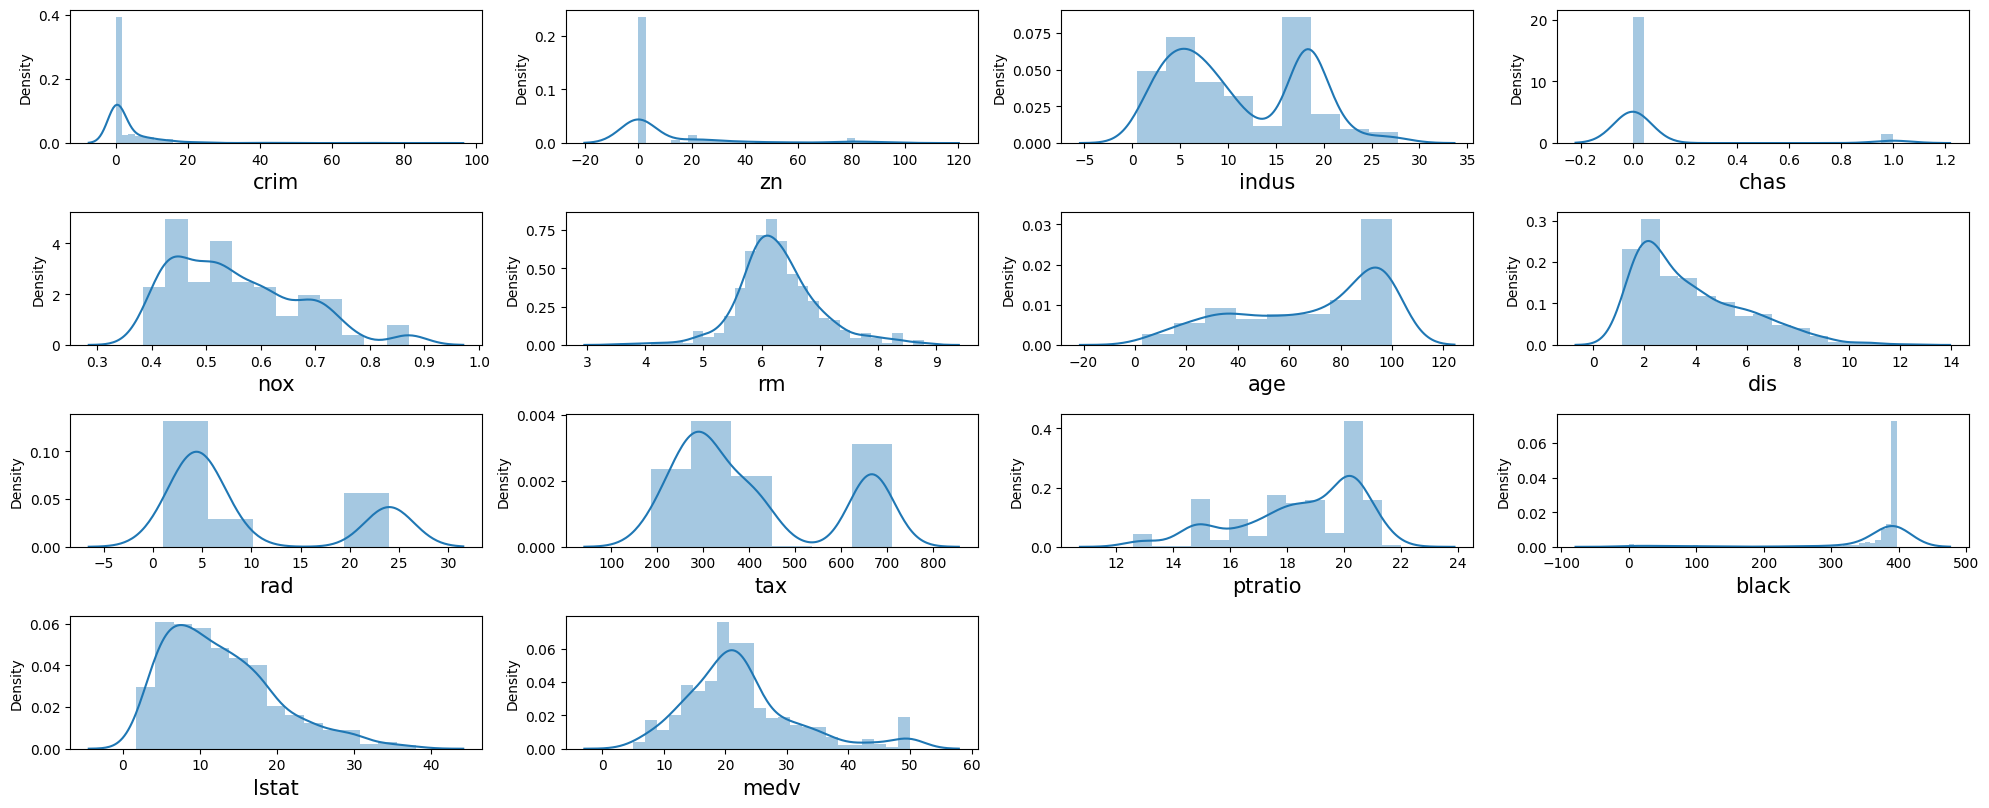

In [22]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.distplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

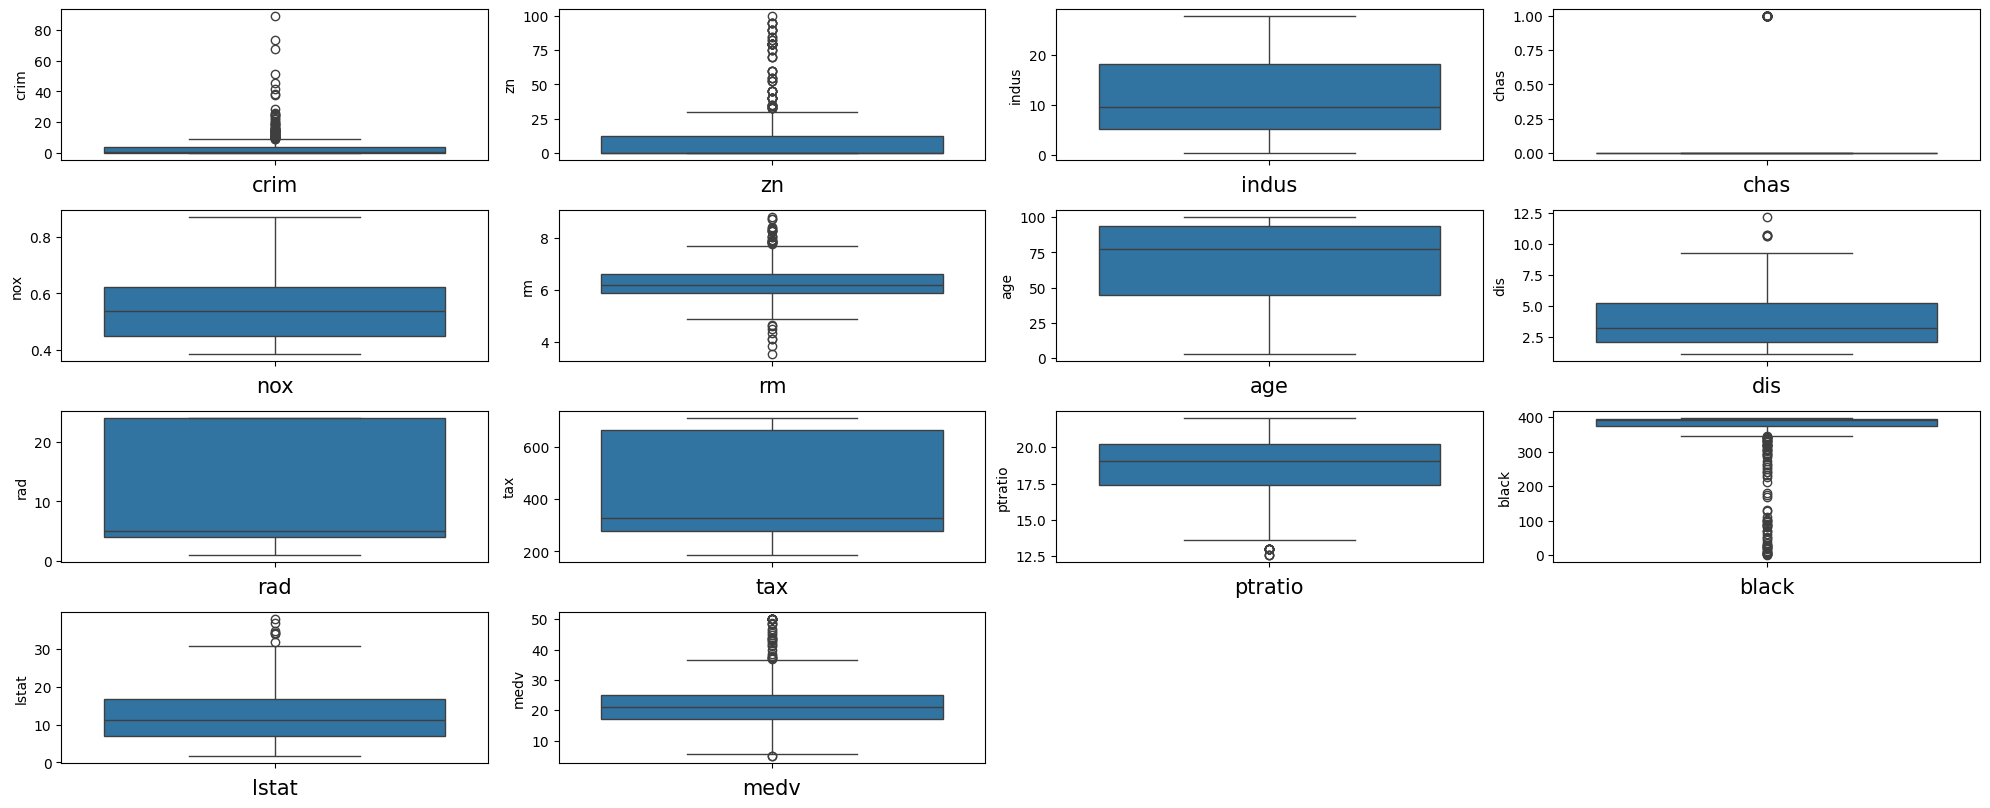

In [23]:
plt.figure(figsize=(20, 40))

plotnum = 1

for columns in df:
    if plotnum <= len(df_clean.columns):
        plt.subplot(20, 4, plotnum)
        sns.boxplot(df_clean[columns])
        plt.xlabel(columns, fontsize=15)
    plotnum += 1
plt.tight_layout()
plt.show

In [24]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # To get all outliers of data
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    # To get all data without outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) | (df_clean[col] <= upper_bound)]


In [25]:
outliers_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
print(outlier_counts)

{'crim': 66, 'zn': 68, 'indus': 0, 'chas': 35, 'nox': 0, 'rm': 30, 'age': 0, 'dis': 5, 'rad': 0, 'tax': 0, 'ptratio': 15, 'black': 77, 'lstat': 7, 'medv': 40}


In [26]:
df_clean = df_clean.reset_index()

In [27]:
df_clean.drop('index', axis=1, inplace=True)
df_clean.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

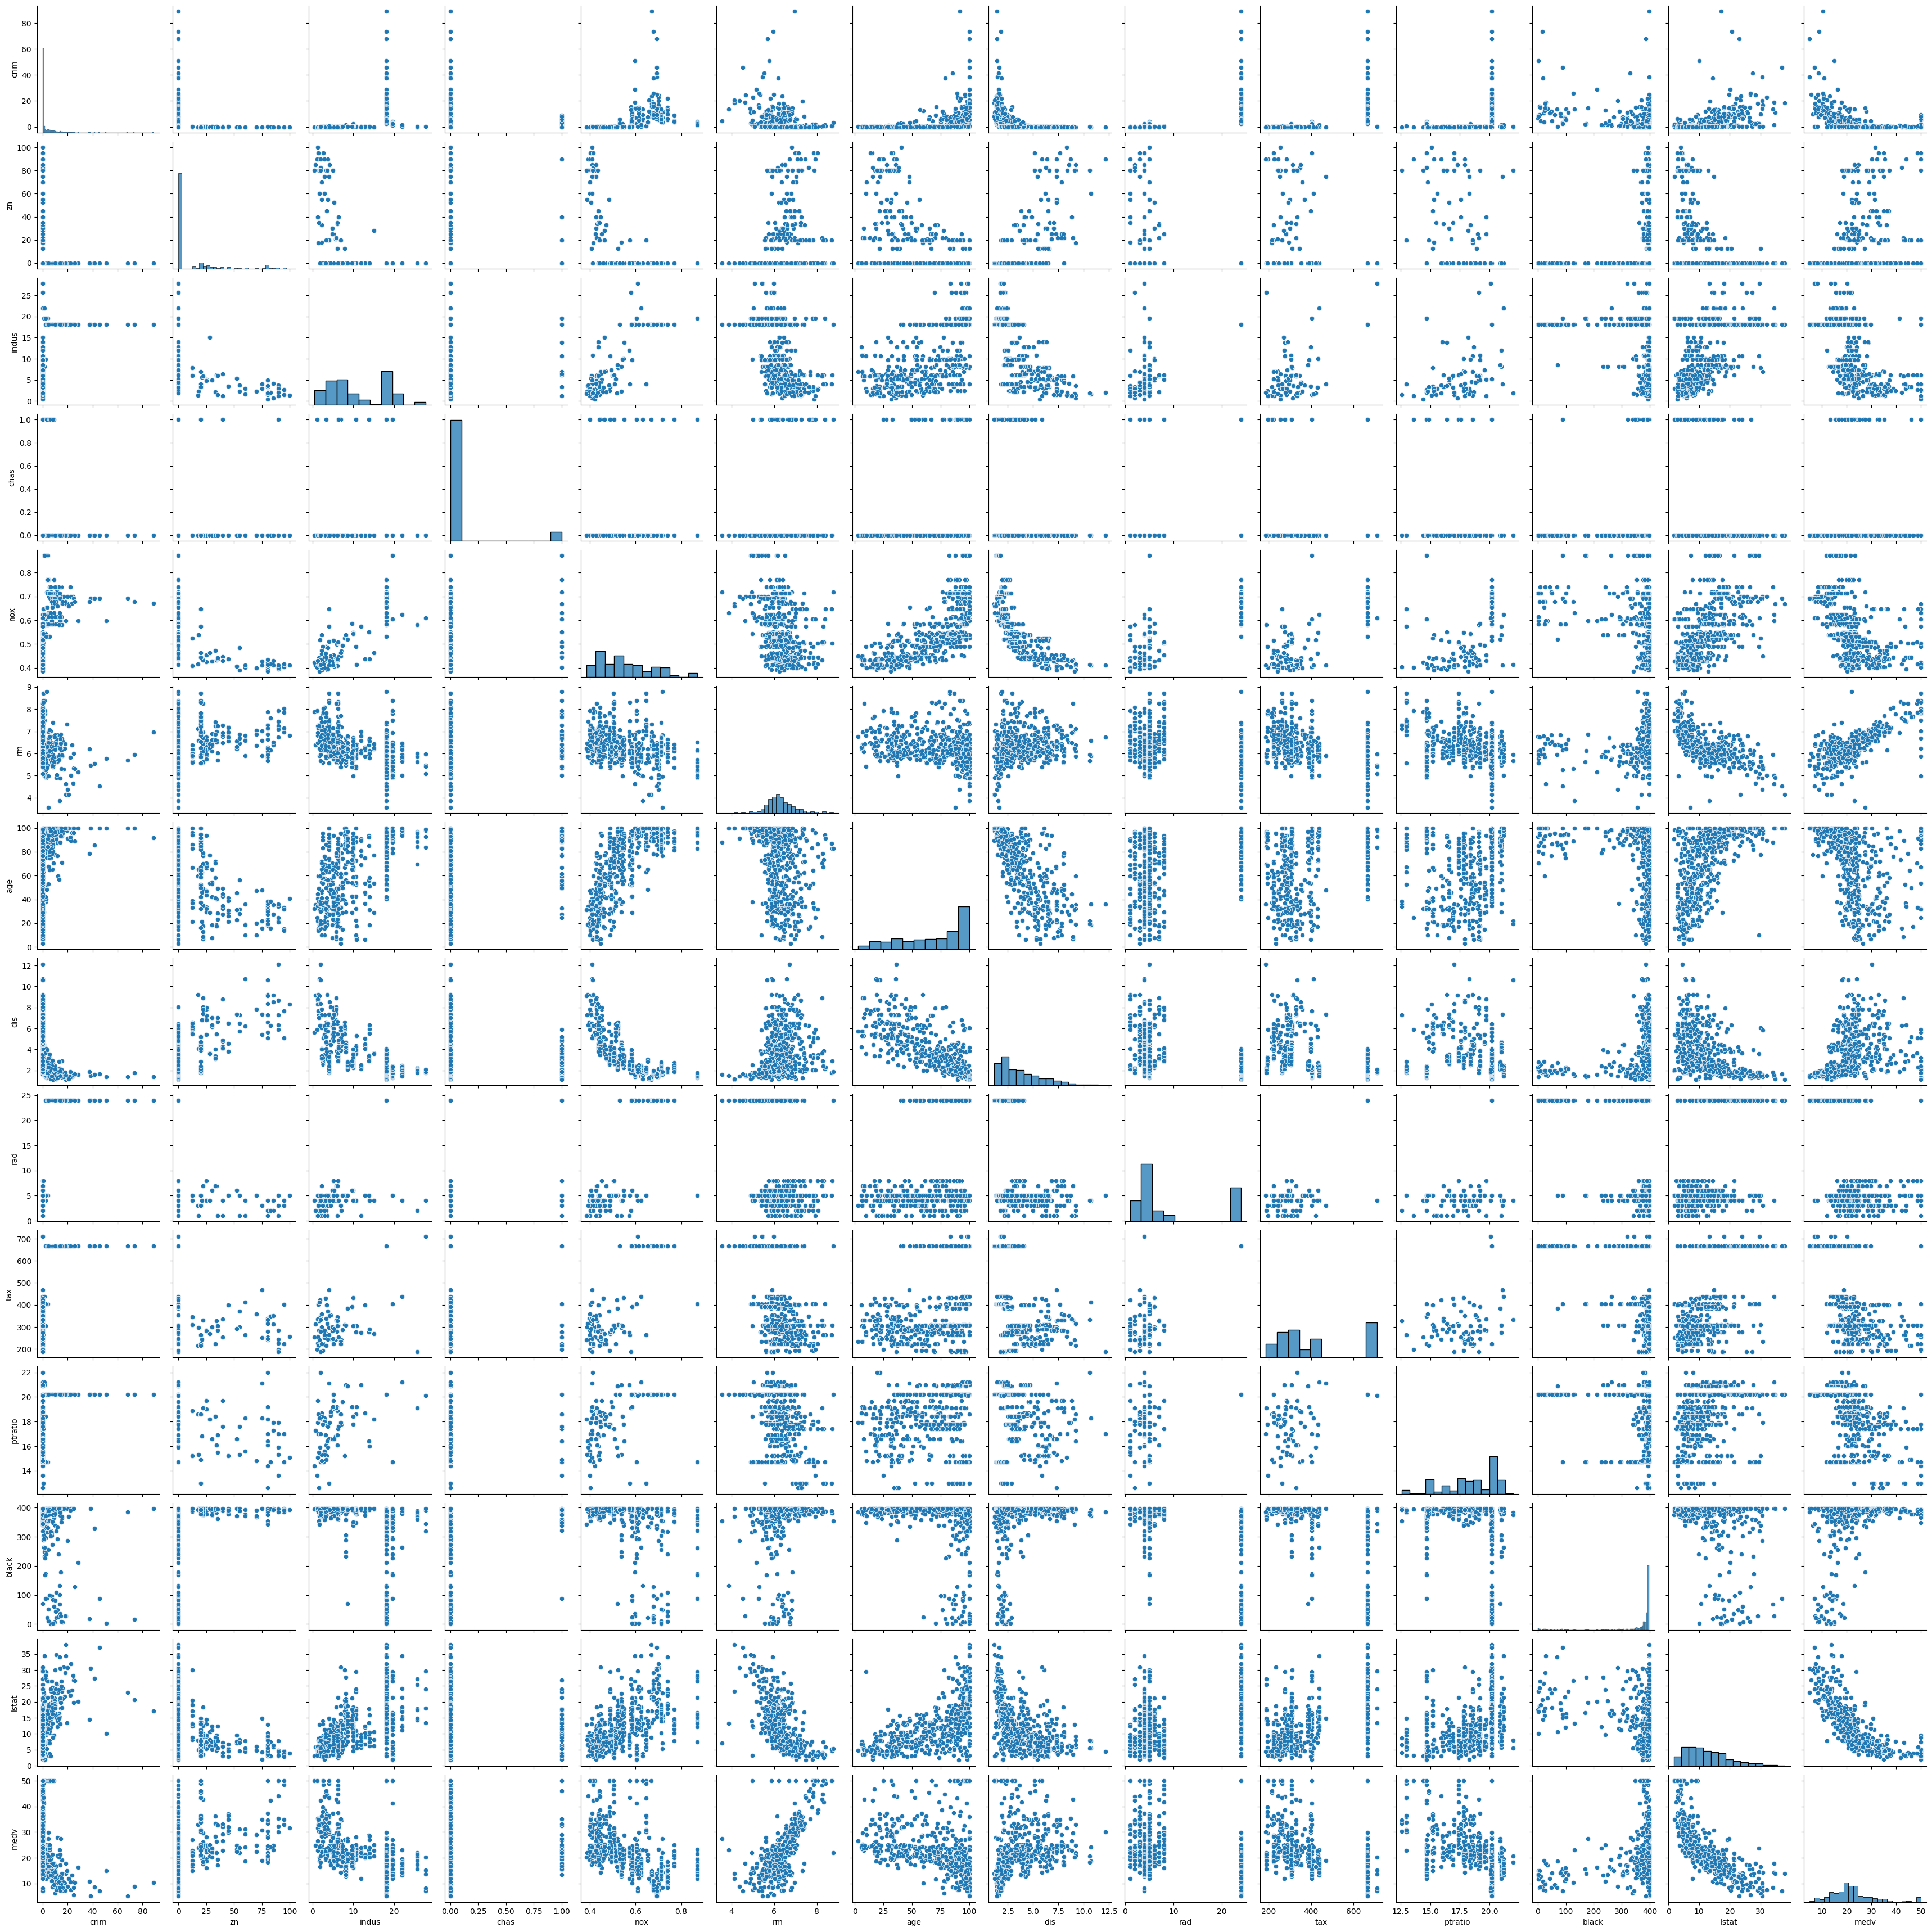

In [28]:
sns.pairplot(df_clean)

In [29]:
skewed_feature = ['CRIM', 'ZN', 'DIS', 'RAD', 'LSTAT', 'TAX']
for col in df_clean:
    df_clean[col] = np.log1p(df_clean[col])

<Axes: >

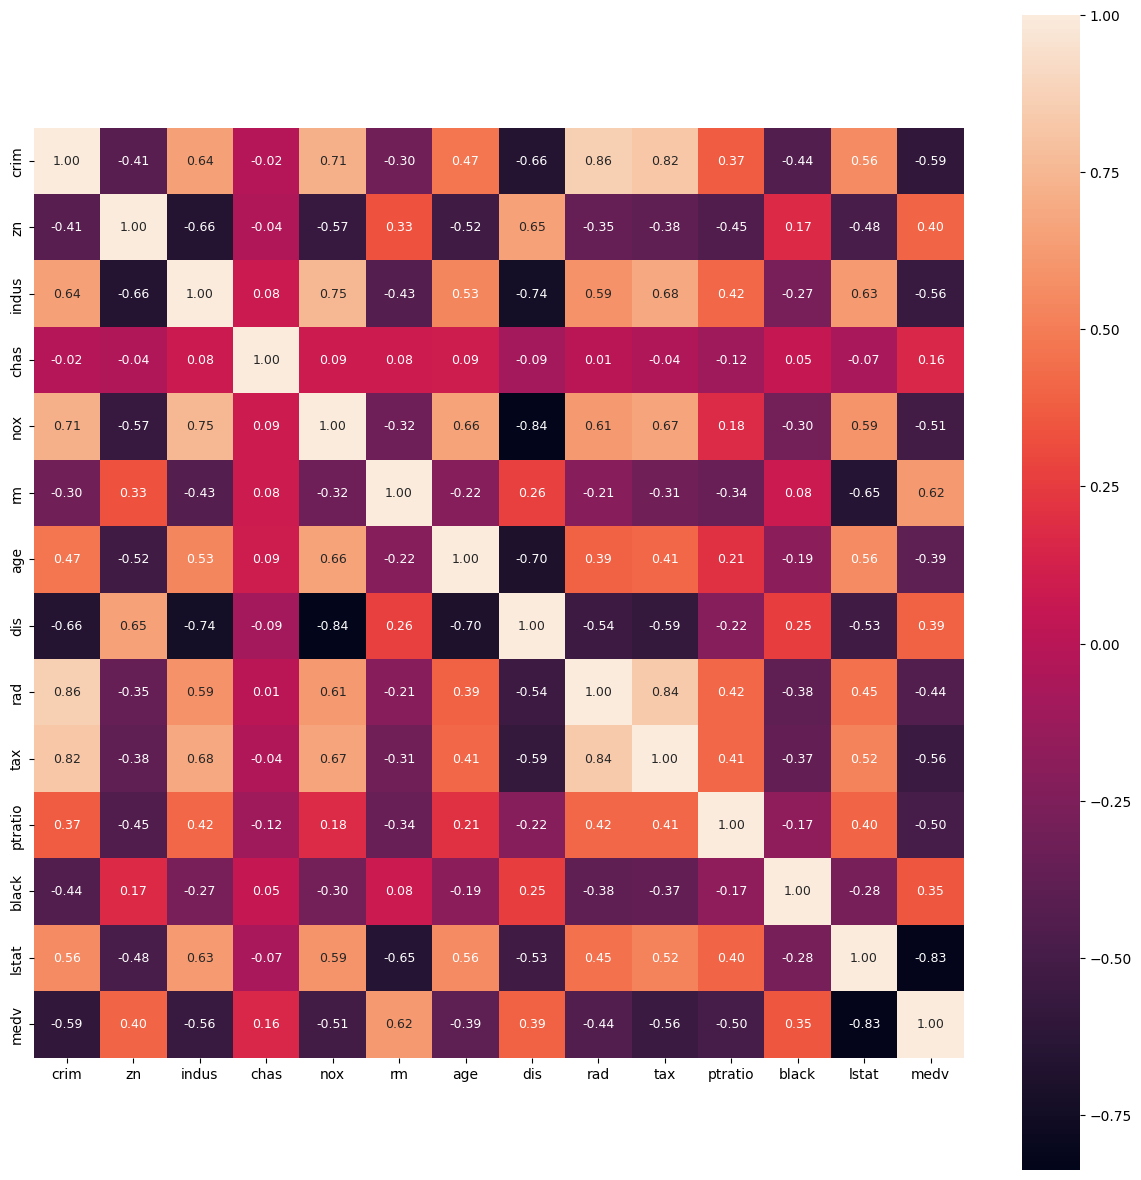

In [33]:
colu = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

corr = df_clean[colu].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt='.2f', cbar=True, square=True, annot=True, annot_kws={'size':9})

In [34]:
x = df_clean.drop(columns=['medv'], axis=1)
y = df_clean.medv

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [37]:
print(f"x shape  :  {x_scaled.shape}")
print(f"y shape  :  {y.shape}")

x shape  :  (506, 13)
y shape  :  (506,)


In [38]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_predict = model.predict(x_test)

In [41]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predict)

In [42]:
print("Model Evaluate Matrics")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared Score (R²): {R2:.2f}")

Model Evaluate Matrics
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared Score (R²): 0.78


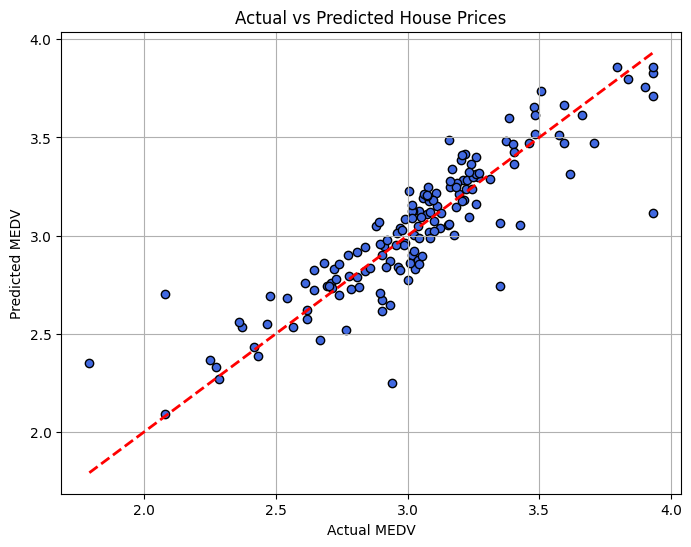

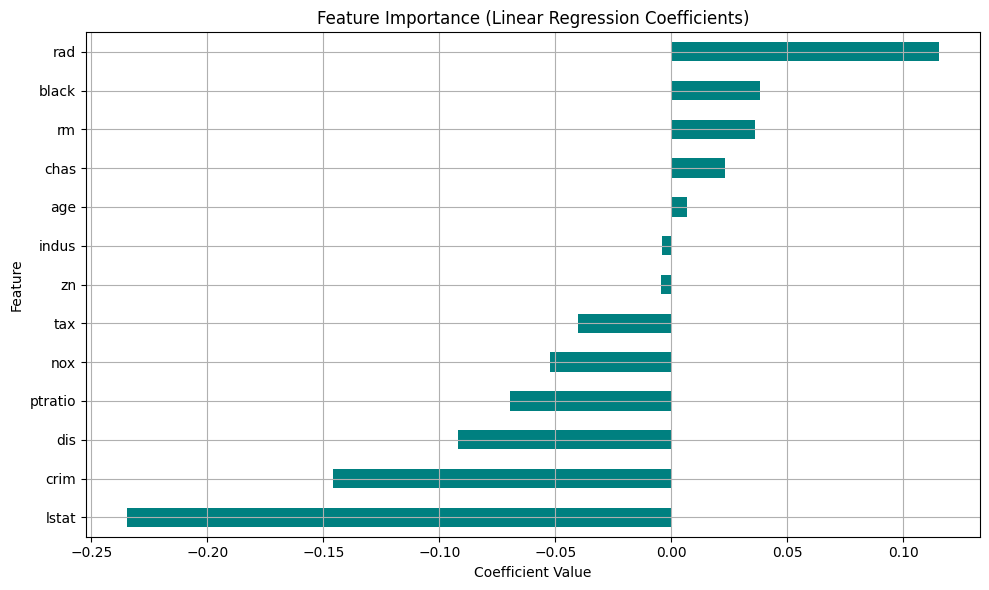

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# ===== Analyze the model parameters (the effect of each feature on the MEDV) =====
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients = coefficients.sort_values()

# Bar plot of the most important effects
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()